In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:

import datetime
import yfinance as yf

In [4]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021,1,1)
divis = yf.download("DIVISLAB.NS", start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [5]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021,1,1)
reddy = yf.download("DRREDDY.NS",  start, end, group_by='ticekr')

[*********************100%***********************]  1 of 1 completed


In [6]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021,1,1)
alkem = yf.download("ALKEM.NS", start, end,group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [7]:
reddy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,2618.100098,2634.000000,2600.000000,2607.050049,2570.652588,338757
2019-01-02,2606.000000,2618.000000,2575.050049,2601.050049,2564.736328,417551
2019-01-03,2605.000000,2614.800049,2564.000000,2577.350098,2541.367188,541891
2019-01-04,2580.000000,2606.000000,2562.000000,2600.000000,2563.700928,407397
2019-01-07,2613.850098,2613.850098,2537.300049,2558.649902,2522.927979,542415


# Normalize the prices
__This is same as cumulative daily returns.__

In [8]:
reddy.iloc[0]['Adj Close']

2570.652587890625

__Creating a function for all 3 stocks and using the formula for normed return in it.__

In [9]:
for stock_df in (reddy,divis,alkem):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [10]:
divis.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2019-01-01,1485.000000,1491.050049,1469.050049,1475.449951,1449.151367,254899,1.000000
2019-01-02,1476.900024,1483.599976,1461.400024,1470.900024,1444.682495,247208,0.996916
2019-01-03,1479.599976,1482.800049,1432.099976,1437.900024,1412.270752,536515,0.974550
2019-01-04,1437.900024,1471.199951,1428.250000,1460.500000,1434.467896,391849,0.989868
2019-01-07,1470.000000,1495.000000,1461.349976,1486.000000,1459.513428,456830,1.007150


__A new column for normed return is now visible.__

In [11]:
alkem.tail()

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2020-12-24,2899.949951,2929.000000,2850.100098,2916.000000,2890.742676,40675,1.530676
2020-12-28,2948.000000,2958.949951,2886.100098,2916.899902,2891.634766,43945,1.531148
2020-12-29,2925.000000,2937.300049,2898.899902,2925.300049,2899.962158,62104,1.535558
2020-12-30,2952.000000,2958.000000,2905.050049,2928.449951,2903.084717,42969,1.537211
2020-12-31,2928.449951,2954.899902,2916.949951,2926.199951,2900.854248,60122,1.536030


# Allocations

__Let's assume that we have the following allocations :<br> 33% in Dr. Reddy's Laboratories Limited<br> 32% in Alkem Laboratories Limited<br> 35% in Divi's Laboratories Limited.__

We will reflect these values by __multiplying our allocations to the normed return.__

In [12]:
for stock_df,allo in zip([reddy,alkem,divis],[0.33,0.32,0.35]):  #all the reddy * 0.4; similar for the others
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [13]:
reddy.head()

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation
Date,,,,,,,,
2019-01-01,2618.100098,2634.000000,2600.000000,2607.050049,2570.652588,338757,1.000000,0.330000
2019-01-02,2606.000000,2618.000000,2575.050049,2601.050049,2564.736328,417551,0.997699,0.329241
2019-01-03,2605.000000,2614.800049,2564.000000,2577.350098,2541.367188,541891,0.988608,0.326241
2019-01-04,2580.000000,2606.000000,2562.000000,2600.000000,2563.700928,407397,0.997296,0.329108
2019-01-07,2613.850098,2613.850098,2537.300049,2558.649902,2522.927979,542415,0.981435,0.323873


# Investments

__Lets say we invested  1 million rupees (10,00,000) in the above portfolio.__

In [14]:
for stock_df in [reddy, alkem, divis]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

# Total portfolio value

__We create a table of position values of the respective stocks and another column of total of the positions for each date.__

In [15]:
portfolio_val=pd.concat([reddy['Position Values'], alkem['Position Values'], divis['Position Values']], axis=1)
portfolio_val.columns=['Dr.Reddy Pos','Alkem Pos', 'Divis Pos']
portfolio_val['Total of Pos']=portfolio_val.sum(axis=1)

In [16]:
portfolio_val.sample(5)

,Dr.Reddy Pos,Alkem Pos,Divis Pos,Total of Pos
Date,,,,
2019-07-09,328962.022787,293697.746960,380755.026683,1.003415e+06
2019-07-04,329411.387722,285986.556195,384242.099195,9.996400e+05
2019-03-26,352189.469991,294095.354910,405128.978369,1.051414e+06
2019-07-24,331509.688165,293084.860252,380517.810464,1.005112e+06
2019-05-03,368024.553742,282292.440565,403717.533025,1.054035e+06


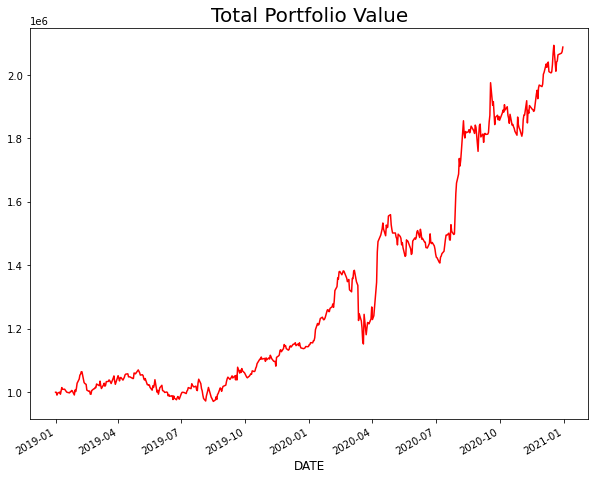

In [17]:
portfolio_val['Total of Pos'].plot(figsize=(10,8), color='red');
plt.title("Total Portfolio Value", fontsize=20);
plt.xlabel("DATE", fontsize='12');

__Let's have a look at the position values of individual stocks simultaneously.__

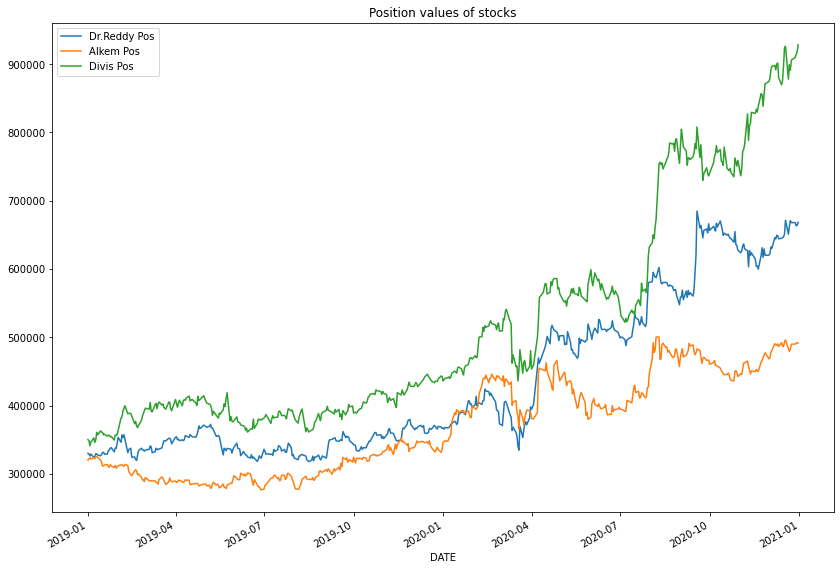

In [18]:
portfolio_val.drop('Total of Pos', axis=1).plot(figsize=(14,10), title="Position values of stocks");
plt.xlabel('DATE');

# Portfolio Statistics

In [19]:
portfolio_val['Daily returns']=portfolio_val['Total of Pos'].pct_change()

In [20]:
portfolio_val.sample(8)

,Dr.Reddy Pos,Alkem Pos,Divis Pos,Total of Pos,Daily returns
Date,,,,,
2019-07-08,328563.304646,293540.404002,373769.029692,9.958727e+05,-0.003274
2019-09-04,331975.224973,303441.179121,398782.162041,1.034199e+06,0.011590
2020-10-19,649325.185222,445370.049793,747119.997493,1.841815e+06,-0.018105
2019-03-08,331012.653816,289896.012635,390789.278612,1.011698e+06,-0.008984
2019-01-16,331253.100725,311283.795829,360520.536332,1.003057e+06,-0.003351
2020-01-21,390361.388354,392204.553085,448490.634841,1.231057e+06,-0.004359
2020-12-03,631982.105711,478368.841461,891778.846186,2.002130e+06,0.015714
2019-07-17,340087.424793,289871.150503,391868.574078,1.021827e+06,-0.004809


# Cumulative return

In [21]:
cum_ret = 100 * (portfolio_val['Total of Pos'][-1]/portfolio_val['Total of Pos'][0] -1 )
print('Our return {} was percent.'.format(cum_ret))

Our return 108.76173797016003 was percent.


# Average daily return

In [22]:
portfolio_val['Daily returns'].mean()

0.0016025152999298

# Standard daily return

In [23]:
portfolio_val['Daily returns'].std()

0.014367770910093275

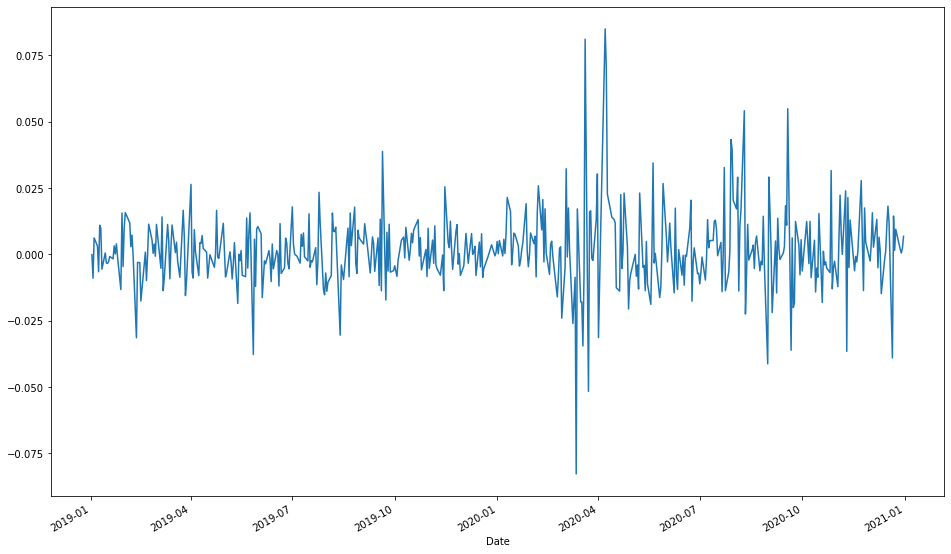

In [24]:
portfolio_val['Daily returns'].plot(kind='line', figsize=(16,10))

# Sharpe ratio

__The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.__<br>

__Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return__<br>

The original Sharpe Ratio is<br>

__Annualized Sharpe Ratio = K-value * SR__

__K-values for various sampling rates:__

Daily = sqrt(252)<br>
Weekly = sqrt(52)<br>
Monthly = sqrt(12)

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [25]:
sr=portfolio_val['Daily returns'].mean()/portfolio_val['Daily returns'].std()
sr

0.11153541561579622

__In theory, the higher the risk, the higher the expected rate of return. The above cumulative return and sharpe ratio agrees with the theory.__

__In case the Sharpe ratio has been computed based on daily returns, it can be annualized by multiplying the ratio by the square root of 252 i.e. number of trading days in a year.__

In [26]:
asr=sr*np.sqrt(252)
asr

1.7705698325737613

# Thank you